<a href="https://colab.research.google.com/github/advaithram12/ST1Capstone-ProjectAR/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Code to split the databse into train, test and validation and have been split based on the ratio provided in the code below, the input and output folder have been provided.

In [ ]:
import splitfolders
input_folder = "/content/drive/MyDrive/Capstone_Databse/space images"

splitfolders.ratio(input_folder,output="/content/drive/MyDrive/Capstone_Databse/Data",seed = 45,ratio=(.7,.2,.1),group_prefix=None)





In [ ]:
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import Image
import tensorflow as tf
import cv2
import os
from PIL import Image
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku



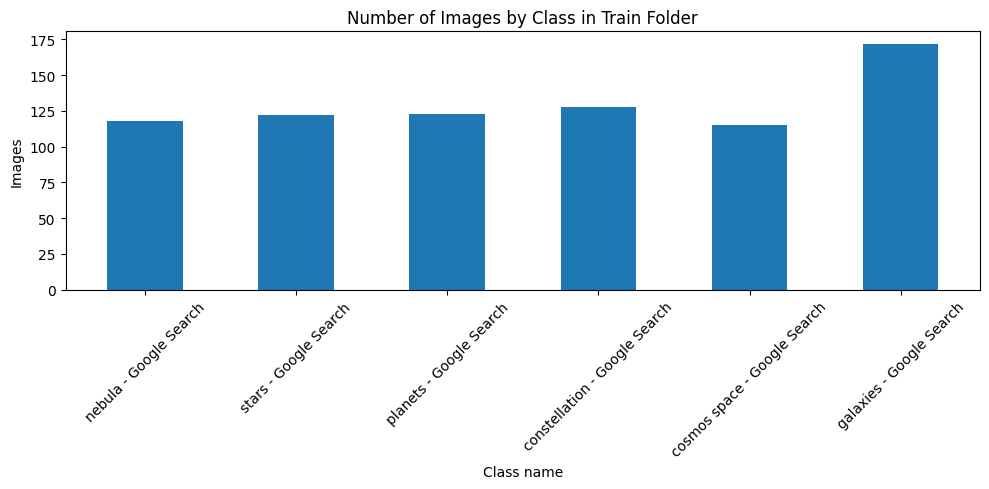

In [ ]:
data_dir = '/content/drive/MyDrive/Capstone_Databse/Data/train'

class_counts = defaultdict(int)

for i in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, i)
    if os.path.isdir(class_dir):
        class_counts[i] = len(os.listdir(class_dir))

plt.figure(figsize=(10, 5))  # Adjust size
plt.bar(class_counts.keys(), class_counts.values(), width=0.5)

# Rotate labels
plt.xticks(rotation=45)

plt.title("Number of Images by Class in Train Folder")
plt.xlabel("Class name")
plt.ylabel("Images")
plt.tight_layout()
plt.show()


(<matplotlib.image.AxesImage at 0x792f7109ec80>,
 Text(0.5, 1.0, 'Original image\n Cosmos Space'))

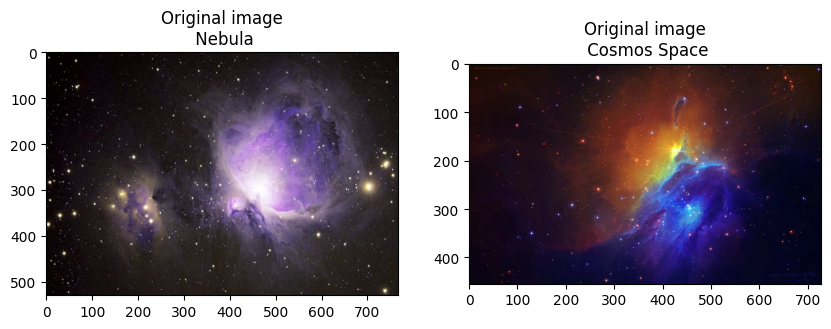

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_path_1 = '/content/drive/MyDrive/Capstone_Databse/Data/train/nebula - Google Search/45.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/Capstone_Databse/Data/train/cosmos space - Google Search/144.jpg'
img_2 = cv2.imread(img_path_2)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_1),plt.title('Original image\n Nebula')
plt.subplot(122)
plt.imshow(img_2),plt.title('Original image\n Cosmos Space')

Geometric Transformation Analysis of Images

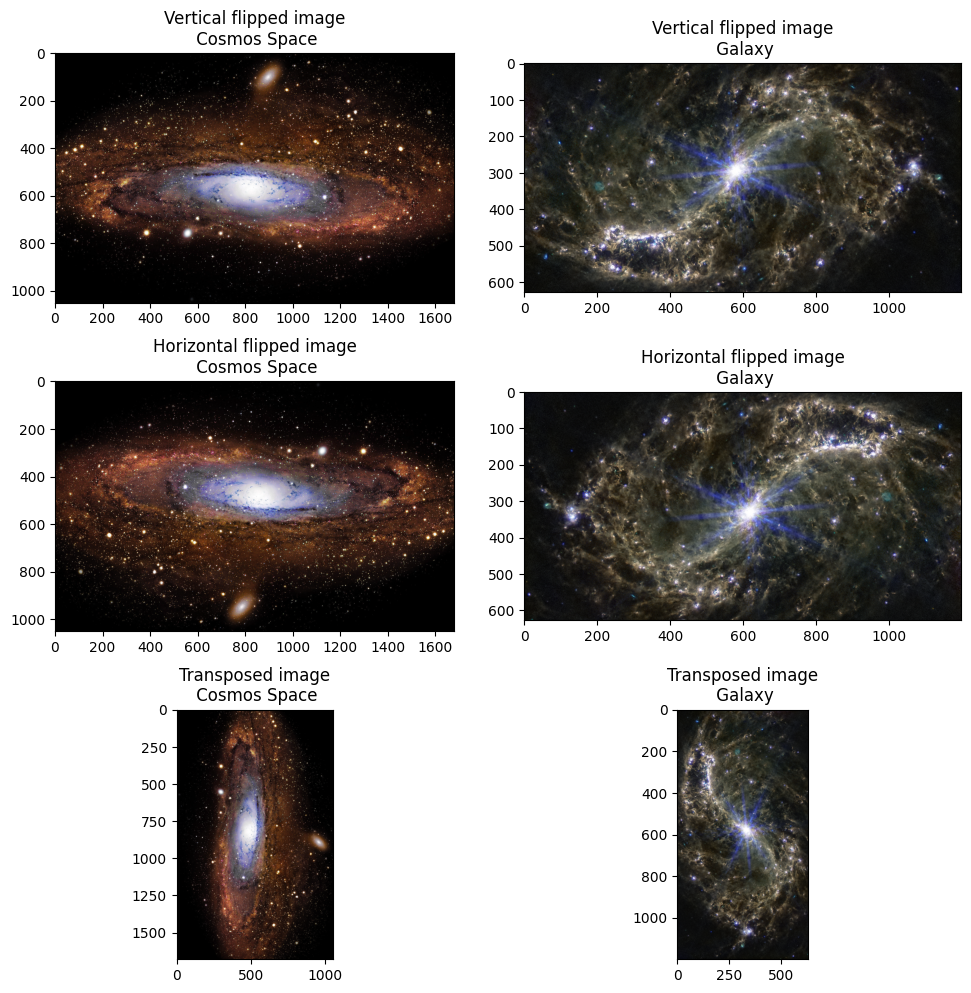

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/Capstone_Databse/Data/train/cosmos space - Google Search/102.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/Capstone_Databse/Data/train/galaxies - Google Search/10.jpg'
img_2 = cv2.imread(img_path_2)

#Basic image manipulation (rotating/flipping/transpose)
flip_img_v1=cv2.flip(img_1,0) # vertical flip
flip_img_v2=cv2.flip(img_2,0) # vertical flip
#horizontal flip
flip_img_h1=cv2.flip(img_1,1) # horizontal flip
flip_img_h2=cv2.flip(img_2,1) # horizontal flip
#transpose
transp_img_1=cv2.transpose(img_1,1) # transpose
transp_img_2=cv2.transpose(img_2,1) # transpose

plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(flip_img_v1),plt.title('Vertical flipped image\n Cosmos Space')
plt.subplot(322)
plt.imshow(flip_img_v2),plt.title('Vertical flipped image\n Galaxy')
plt.subplot(323)
plt.imshow(flip_img_h1), plt.title('Horizontal flipped image\n Cosmos Space')
plt.subplot(324)
plt.imshow(flip_img_h2), plt.title('Horizontal flipped image\n Galaxy')
plt.subplot(325)
plt.imshow(transp_img_1),plt.title('Transposed image\n Cosmos Space')
plt.subplot(326)
plt.imshow(transp_img_2),plt.title('Transposed image\n Galaxy')
plt.tight_layout()
plt.show()

Color and Texture Feature Analysis

(<Axes: title={'center': 'Blurred image(d=6)\n Planet'}>,
 Text(0.5, 1.0, 'Blurred image(d=6)\n Planet'))

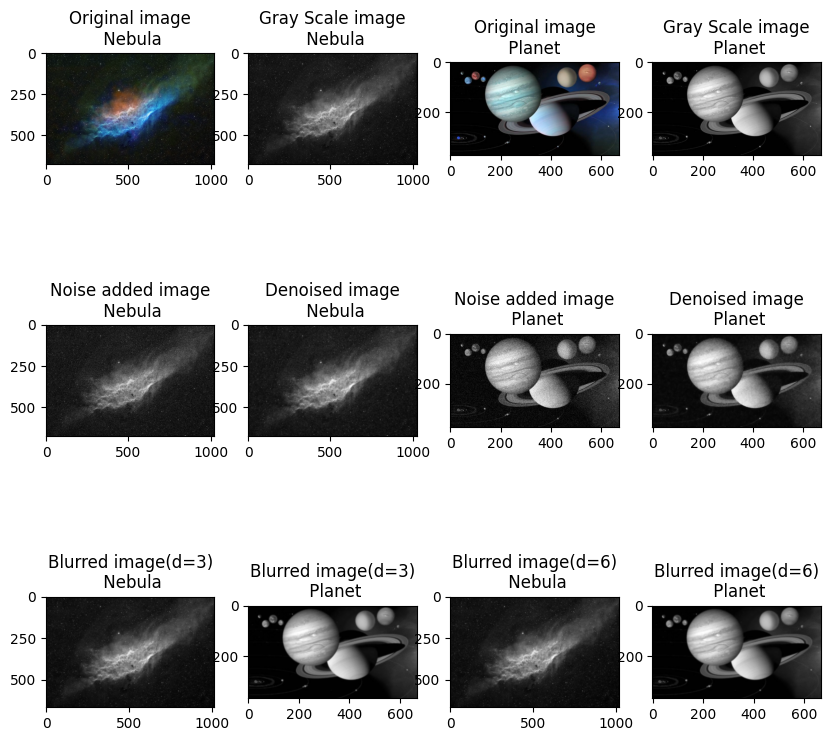

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/Capstone_Databse/Data/train/nebula - Google Search/113.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/Capstone_Databse/Data/train/planets - Google Search/101.jpg'
img_2 = cv2.imread(img_path_2)

#gray scale conversion
img_1_gray = skic.rgb2gray(img_1)
img_2_gray = skic.rgb2gray(img_2)

# We add Gaussian noise and denoise using denoise_tv_bregman approach
#for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)
img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)

#Noise reduction using Gaussian Blur
d=3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_1_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.figure(figsize=(10,10))
#VisualisingGray scale images visualisation
plt.subplot(341), plt.imshow(img_1),plt.title('Original image\n Nebula')
plt.subplot(342), plt.imshow(img_1_gray, cmap = 'gray'),plt.title('Gray Scale image\n Nebula')
plt.subplot(343), plt.imshow(img_2),plt.title('Original image\n Planet ')
plt.subplot(344), plt.imshow(img_2_gray, cmap = 'gray'),plt.title('Gray Scale image\n Planet')

#Visualising Noising-Denoising images
plt.subplot(345), plt.imshow(img_1_n,cmap = 'gray'), plt.title('Noise added image\n Nebula')
plt.subplot(346), plt.imshow(img_1_d,cmap = 'gray'),plt.title('Denoised image\n Nebula')
plt.subplot(347), plt.imshow(img_2_n,cmap = 'gray'),plt.title('Noise added image\n Planet')
plt.subplot(348), plt.imshow(img_2_d,cmap = 'gray'),plt.title('Denoised image\n Planet')

#Visualising Noise Reduction with Gaussian Blurring
plt.subplot(349), plt.imshow(img_1_blur3,cmap = 'gray'), plt.title('Blurred image(d=3)\n Nebula')
plt.subplot(3,4,10), plt.imshow(img_2_blur3,cmap = 'gray'),plt.title('Blurred image(d=3)\n Planet')
plt.subplot(3,4,11), plt.imshow(img_1_blur6,cmap = 'gray'),plt.title('Blurred image(d=6)\n Nebula')
plt.subplot(3,4,12), plt.imshow(img_2_blur6,cmap = 'gray'),plt.title('Blurred image(d=6)\n Planet')

salient discriminative  feature analysis of images from different classes involving edges and corner detection

(<Axes: title={'center': 'Image with Corners\n Cosmos Space'}>,
 Text(0.5, 1.0, 'Image with Corners\n Cosmos Space'))

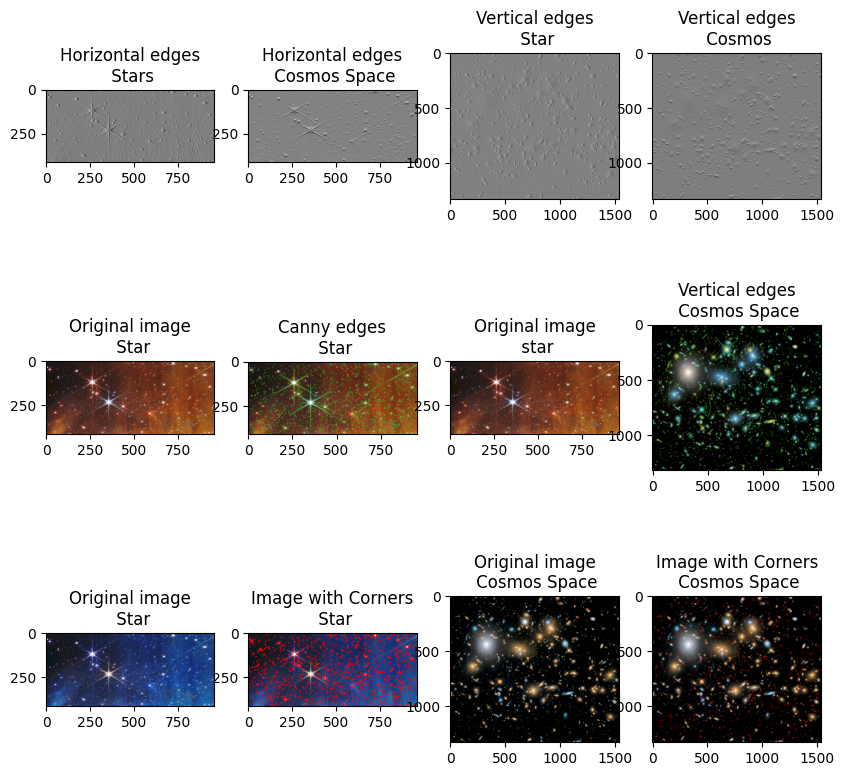

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/Capstone_Databse/Data/train/stars - Google Search/101.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/Capstone_Databse/Data/train/cosmos space - Google Search/104.jpg'
img_2 = cv2.imread(img_path_2)

#Sobel edge detector
#edge detector works on gray scale images
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)

sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)

#Canny edge detector

#threshold selection
th1=30
th2=60
# Canny recommends threshold 2 is 3 times threshold 1
# you could try experimenting with this...
d=3
# gaussian blur
# this takes pixels in edgeresult where edge non-zero and colours them bright green

edgeresult_1=img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)

edgeresult_2=img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)

#Corner detector
#detecting corners for  image_1
harris_1=img_1.copy()
#greyscale it
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]

#detecting corners for image_2
harris_2=img_2.copy()
#greyscale it
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_2[dst>0.01*dst.max()]=[0,0,255]


#Visualisng Edges and Corners
plt.figure(figsize=(10,10))
#Visualising Sobel Edges
plt.subplot(341), plt.imshow(sobelx_img_1, cmap = 'gray'),plt.title('Horizontal edges\n Stars')
plt.subplot(342), plt.imshow(sobely_img_1, cmap = 'gray'),plt.title('Horizontal edges\n Cosmos Space')
plt.subplot(343), plt.imshow(sobelx_img_2, cmap = 'gray'),plt.title('Vertical edges\n Star')
plt.subplot(344), plt.imshow(sobely_img_2, cmap = 'gray'),plt.title('Vertical edges\n Cosmos')
#Visualising Canny Edges
plt.subplot(345), plt.imshow(img_1),plt.title('Original image\n Star')
plt.subplot(346), plt.imshow(edgeresult_1, cmap = 'gray'),plt.title('Canny edges\n Star')
plt.subplot(347), plt.imshow(img_1),plt.title('Original image\n star')
plt.subplot(348), plt.imshow(edgeresult_2, cmap = 'gray'),plt.title('Vertical edges\n Cosmos Space')
#Visualising Corners
plt.subplot(349), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Star')
plt.subplot(3,4,10), plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n Star')
plt.subplot(3,4,11), plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Cosmos Space')
plt.subplot(3,4,12), plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n Cosmos Space')

analysing illumination and lighting artefacts by examining the camera effects/exposure of an image

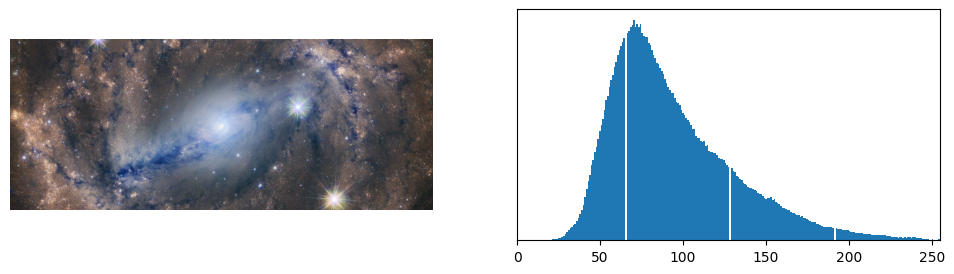

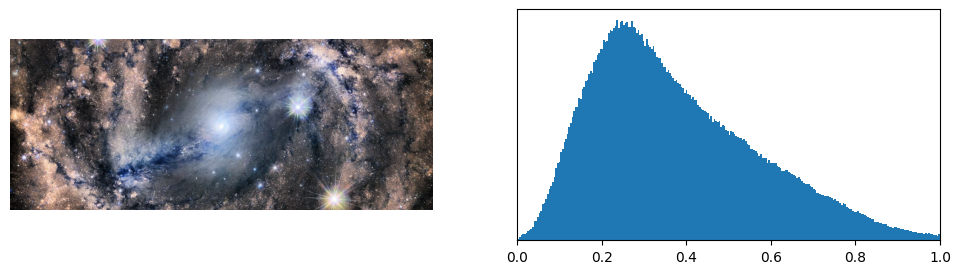

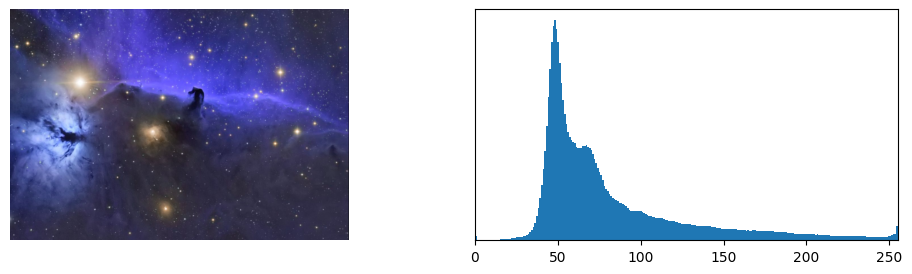

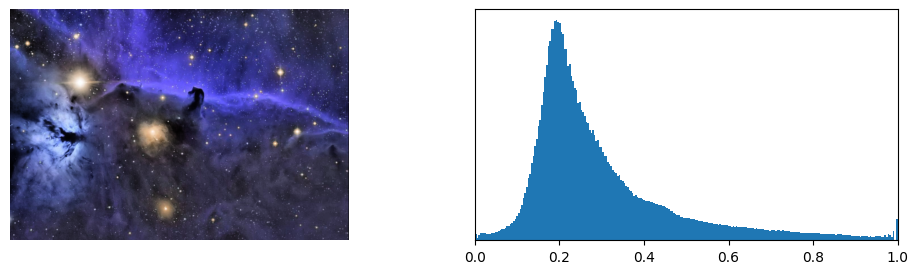

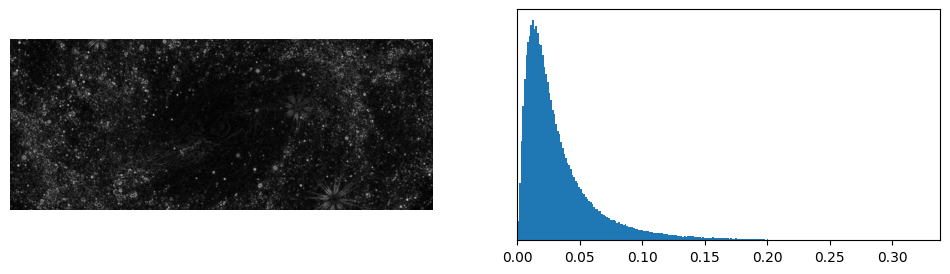

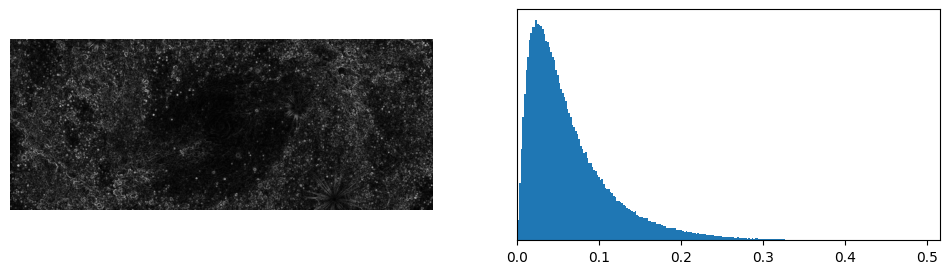

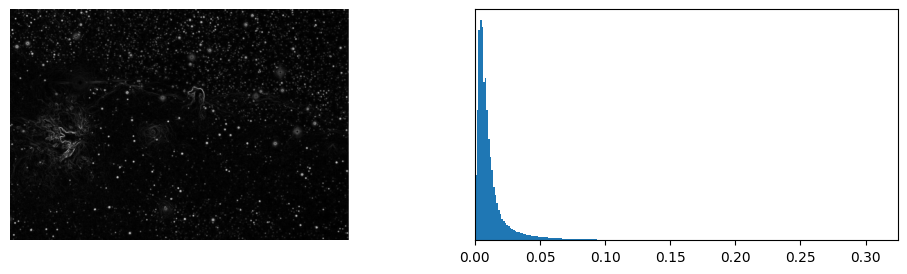

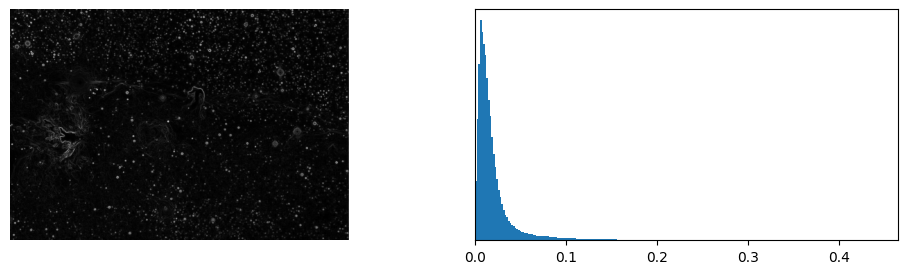

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import skimage.exposure as skie
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/Capstone_Databse/Data/train/galaxies - Google Search/122.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/Capstone_Databse/Data/train/nebula - Google Search/78.jpg'
img_2 = cv2.imread(img_path_2)


def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))

    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()


    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])
    plt.show()

show(img_1)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_1))


show(img_2)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_2))


#class 1 image
img = skic.rgb2gray(img_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq_1 = skif.sobel(img)
show(sobimg_heq_1)
#class 2 image
img = skic.rgb2gray(img_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq_2 = skif.sobel(img)
show(sobimg_heq_2)

In [ ]:
cv2.imread('/content/drive/MyDrive/Capstone_Databse/space images/galaxies - Google Search/1.jpg')

array([[[18, 24, 19],
        [18, 20, 21],
        [21, 18, 20],
        ...,
        [18, 20, 20],
        [22, 26, 31],
        [21, 23, 33]],

       [[11, 19, 18],
        [18, 21, 19],
        [29, 19, 19],
        ...,
        [19, 24, 25],
        [17, 24, 27],
        [27, 32, 35]],

       [[16, 19, 23],
        [16, 20, 21],
        [23, 21, 13],
        ...,
        [23, 29, 34],
        [16, 24, 24],
        [23, 26, 24]],

       ...,

       [[19, 26, 29],
        [18, 22, 23],
        [16, 20, 21],
        ...,
        [22, 20, 19],
        [27, 21, 22],
        [23, 20, 15]],

       [[27, 25, 25],
        [25, 24, 20],
        [24, 25, 23],
        ...,
        [13, 16, 21],
        [29, 24, 26],
        [23, 22, 18]],

       [[21, 21, 21],
        [18, 20, 21],
        [14, 17, 15],
        ...,
        [30, 29, 38],
        [33, 27, 32],
        [31, 27, 26]]], dtype=uint8)

In [ ]:
cv2.imread('/content/drive/MyDrive/Capstone_Databse/space images/galaxies - Google Search/1.jpg').shape

(810, 1440, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
val = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale= 1/255)

d1 = train.flow_from_directory('/content/drive/MyDrive/Capstone_Databse/Data/train', target_size = (400,400),
                               batch_size = 5,
                               class_mode = "binary")

d2 = train.flow_from_directory('/content/drive/MyDrive/Capstone_Databse/Data/val', target_size=(400,400),
                               batch_size=5,
                               class_mode = "binary")
d3 = train.flow_from_directory('/content/drive/MyDrive/Capstone_Databse/Data/test',target_size=(400,400),
                               batch_size=5,
                               class_mode = "binary")


Found 778 images belonging to 6 classes.
Found 332 images belonging to 6 classes.
Found 116 images belonging to 6 classes.


In [ ]:
d1.class_indices


{'constellation - Google Search': 0,
 'cosmos space - Google Search': 1,
 'galaxies - Google Search': 2,
 'nebula - Google Search': 3,
 'planets - Google Search': 4,
 'stars - Google Search': 5}

In [ ]:
d2.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5], dtype=int32)

Neural Network

In [ ]:
data_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (400,400,3))
                                              ,tf.keras.layers.MaxPool2D(2,2),
                                         ##
                                         tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                         tf.keras.layers.MaxPool2D(2,2),
                                         ##
                                         tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                         tf.keras.layers.MaxPool2D(2,2),
                                         ##
                                         tf.keras.layers.Flatten(),
                                         ##
                                         tf.keras.layers.Dense(512,activation="relu"),
                                         ##
                                         tf.keras.layers.Dense(1,activation='sigmoid')
                                         ])

In [ ]:
from keras.src.callbacks import History

data_model.compile(loss = "binary_crossentropy",
                   optimizer = RMSprop(lr=0.001),
                   metrics = ['accuracy'])
History=data_model.fit(d1,steps_per_epoch=5,epochs = 11,
               validation_data = d2)

Epoch 1/11
5/5 [==============================] - 271s 63s/step - loss: -1802.9304 - accuracy: 0.2400 - val_loss: -17030.7734 - val_accuracy: 0.1476
Epoch 2/11
5/5 [==============================] - 26s 6s/step - loss: -62750.5508 - accuracy: 0.0800 - val_loss: -234585.5938 - val_accuracy: 0.1476
Epoch 3/11
5/5 [==============================] - 28s 6s/step - loss: -486048.1875 - accuracy: 0.2400 - val_loss: -1164824.3750 - val_accuracy: 0.1476
Epoch 4/11
5/5 [==============================] - 23s 5s/step - loss: -1680077.1250 - accuracy: 0.0800 - val_loss: -3161170.0000 - val_accuracy: 0.1476
Epoch 5/11
5/5 [==============================] - 24s 5s/step - loss: -3379667.2500 - accuracy: 0.2400 - val_loss: -6284821.0000 - val_accuracy: 0.1476
Epoch 6/11
5/5 [==============================] - 24s 5s/step - loss: -8215037.5000 - accuracy: 0.1600 - val_loss: -11483067.0000 - val_accuracy: 0.1476
Epoch 7/11
5/5 [==============================] - 20s 5s/step - loss: -13624218.0000 - accurac

In [ ]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

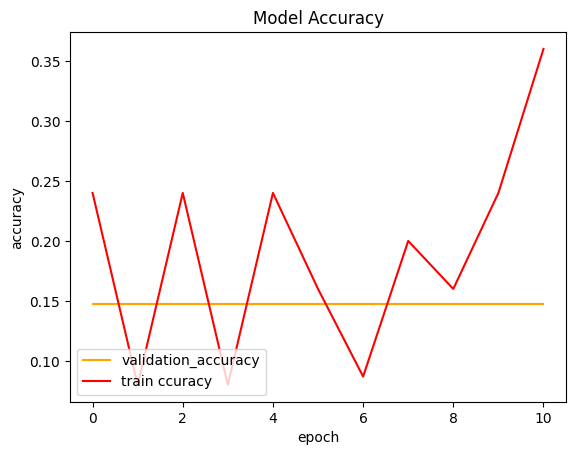

<Figure size 1500x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

l3, = plt.plot(History.history['val_accuracy'], color='orange', label="validation_accuracy")
l4, = plt.plot(History.history['accuracy'], color='red', label="train ccuracy")

plt.legend(handles=[l3, l4], loc='lower left')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Model Accuracy")
plt.figure().set_figwidth(15)
plt.show()


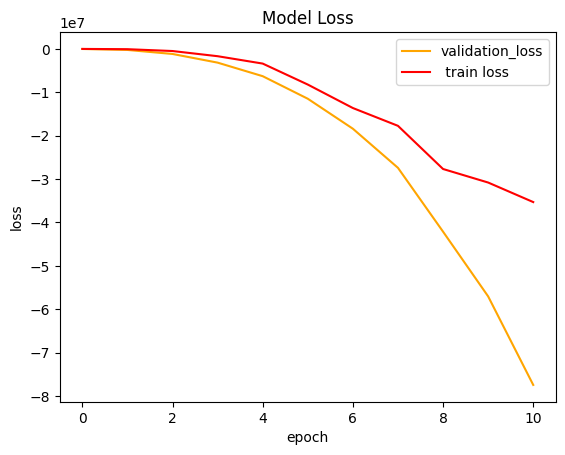

In [ ]:
l1, = plt.plot(History.history['val_loss'], color='orange', label="validation_loss")
l2, = plt.plot(History.history['loss'], color='red', label=" train loss")



plt.legend(handles=[l1, l2], loc='upper right')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Model Loss")
plt.show()

In [ ]:
from tensorflow.keras import Model

In [ ]:
# Confusion Matrix


from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

preds = data_model.predict_generator(d3)
y_pred = np.argmax(preds, axis=1)





<ipython-input-9-d87971ccc51f>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = data_model.predict_generator(d3)


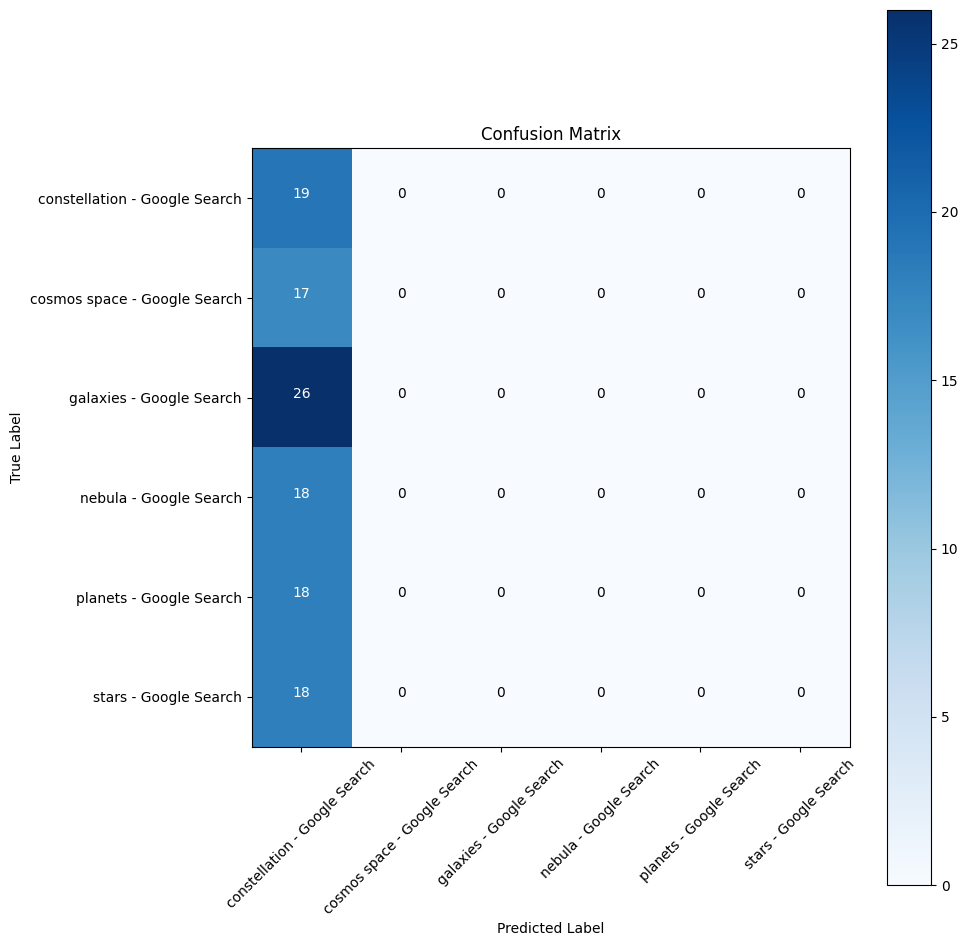

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
g_dict = d3.class_indices
classes = list(g_dict.keys())
# Confusion matrix
cm = confusion_matrix(d3.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white'
if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(d3.classes, y_pred, target_names=classes))

                               precision    recall  f1-score   support

constellation - Google Search       0.16      1.00      0.28        19
 cosmos space - Google Search       0.00      0.00      0.00        17
     galaxies - Google Search       0.00      0.00      0.00        26
       nebula - Google Search       0.00      0.00      0.00        18
      planets - Google Search       0.00      0.00      0.00        18
        stars - Google Search       0.00      0.00      0.00        18

                     accuracy                           0.16       116
                    macro avg       0.03      0.17      0.05       116
                 weighted avg       0.03      0.16      0.05       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tf.keras.models.save_model(data_model,"model.h5")

<ipython-input-11-40a8d32322ca>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(data_model,"model.h5")


In [ ]:
from tensorflow.keras.models import load_model
data_model.save('/content/drive/MyDrive/Capstone_Databse/Untitled Folder/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
